# 1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат

In [1]:
from skimage import io


image = io.imread('parrots.jpg')

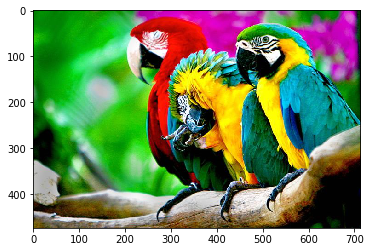

In [2]:
import pylab
%matplotlib inline


pylab.imshow(image)

In [3]:
import skimage


float_image = skimage.img_as_float(image)

# 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB

In [4]:
float_image.shape

(474, 713, 3)

In [5]:
import numpy as np


matrix_image = np.reshape(float_image, newshape=(
    float_image.shape[0] * float_image.shape[1],
    float_image.shape[2]))

# 3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру

In [11]:
from sklearn import cluster

n_clusters = 11
image_clusters = cluster.KMeans(random_state=241, n_clusters=n_clusters)
image_clusters.fit(matrix_image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

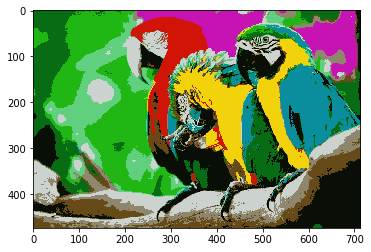

In [12]:
mean_matrix_image = np.zeros_like(matrix_image)
for i in range(n_clusters):
    color = np.mean(np.compress(image_clusters.labels_ == i, matrix_image, axis=0), axis=0, keepdims=True)
    mean_matrix_image += (np.reshape(image_clusters.labels_, (image_clusters.labels_.shape[0] ,1)) == i) * color
cluster_mean_image = np.reshape(mean_matrix_image, newshape=(
    float_image.shape[0], 
    float_image.shape[1],
    float_image.shape[2]))
pylab.imshow(cluster_mean_image)

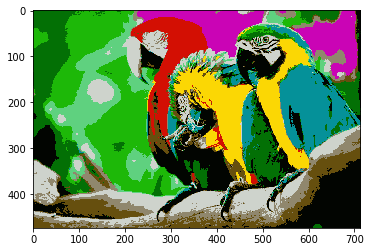

In [13]:
median_matrix_image = np.zeros_like(matrix_image)
for i in range(n_clusters):
    color = np.median(np.compress(image_clusters.labels_ == i, matrix_image, axis=0), axis=0, keepdims=True)
    median_matrix_image += (np.reshape(image_clusters.labels_, (image_clusters.labels_.shape[0] ,1)) == i) * color
cluster_median_image = np.reshape(median_matrix_image, newshape=(
    float_image.shape[0], 
    float_image.shape[1],
    float_image.shape[2]))
pylab.imshow(cluster_median_image)

# 4. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно [см. определение](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)

In [14]:
- 10 * np.log10(np.mean((mean_matrix_image - matrix_image) ** 2))

20.127588746514583

In [15]:
- 10 * np.log10(np.mean((median_matrix_image - matrix_image) ** 2))

19.84128407389954

# 5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче

**Ответ:**


11